# EDA for RAW recipes dataset #

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [2]:
datapath = 'data/'
filename = 'RAW_recipes.csv'

In [3]:
df = pd.read_csv(datapath + filename, index_col='id')

In [4]:
df

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
493372,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
308080,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8


In [5]:
df[df.duplicated()]

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,


No duplicates!

In [6]:
df.dtypes

name              object
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

### Fixing date ###

In [7]:
df['submitted'] = df['submitted'].astype('datetime64')

In [8]:
df.dtypes

name                      object
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
tags                      object
nutrition                 object
n_steps                    int64
steps                     object
description               object
ingredients               object
n_ingredients              int64
dtype: object

### Fixing lists ###

We turn columns that were strings into lists of strings

In [9]:
for col in ['nutrition', 'tags', 'ingredients', 'steps']:
    df[col] = df[col].apply(lambda x: literal_eval(x))

### Check conversion of steps ###

In [10]:
([len(el) for el in df.steps.values] == df.n_steps).describe()

count     231637
unique         1
top         True
freq      231637
Name: n_steps, dtype: object

### Check conversion of ingredients ###

In [11]:
([len(el) for el in df.ingredients.values] == df.n_ingredients).describe()

count     231637
unique         1
top         True
freq      231637
Name: n_ingredients, dtype: object

### Describe dates ###

In [12]:
df.submitted.describe()

count                  231637
unique                   5090
top       2000-03-06 00:00:00
freq                      470
first     1999-08-06 00:00:00
last      2018-12-04 00:00:00
Name: submitted, dtype: object

### Describe dataset ###

In [13]:
df.describe()

,minutes,contributor_id,n_steps,n_ingredients
count,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,9.398546e+03,5.534885e+06,9.765499,9.051153
std,4.461963e+06,9.979141e+07,5.995128,3.734796
min,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,6.500000e+01,3.982750e+05,12.000000,11.000000
max,2.147484e+09,2.002290e+09,145.000000,43.000000


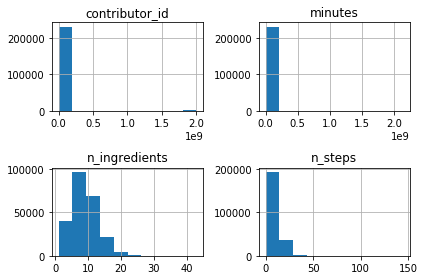

In [14]:
df.hist()
plt.tight_layout()

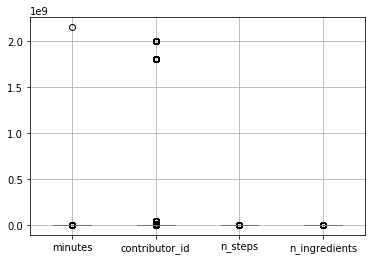

In [15]:
df.boxplot()

In [16]:
df[df['minutes'] > 600]

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,
42198,better than sex strawberries,1460,41531,2002-10-03,"[weeknight, time-to-make, course, main-ingredi...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,[crush vanilla wafers into fine crumbs and lin...,simple but sexy. this was in my local newspape...,"[vanilla wafers, butter, powdered sugar, eggs,...",7
67547,better then bush s baked beans,2970,85627,2003-07-26,"[weeknight, time-to-make, course, main-ingredi...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,[in a very large sauce pan cover the beans and...,i'd have to say that this is a labor of love d...,"[great northern bean, chicken bouillon cubes, ...",13
26995,keep it going german friendship cake,14450,37305,2002-04-30,"[weeknight, time-to-make, course, main-ingredi...","[724.4, 38.0, 297.0, 20.0, 18.0, 31.0, 39.0]",13,[mix starter ingredients in a bowl and let sta...,"yes, this sounds bizarre, but it really is tas...","[flour, water, dry yeast, milk, sugar, eggs, v...",17
24478,marijuana vinegar,20160,32692,2002-04-08,"[weeknight, time-to-make, course, cuisine, pre...","[3.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5,"[mix the herbs and vinegar together in a jar, ...",stefan and emily used to make this stuff when ...,"[fresh herbs, cider vinegar, fresh herb]",3
64302,red macaroni salad,1470,82367,2003-06-11,"[weeknight, time-to-make, course, main-ingredi...","[572.6, 43.0, 113.0, 11.0, 17.0, 18.0, 24.0]",7,"[in large mixing bowl , combine your macaroni&...",this is not your usual macaroni salad....there...,"[elbow macaroni, green pepper, onion, celery, ...",10
...,...,...,...,...,...,...,...,...,...,...,...
151605,zesty slow cooker italian pot roast,610,53959,2006-01-13,"[time-to-make, course, main-ingredient, cuisin...","[912.8, 85.0, 19.0, 9.0, 113.0, 112.0, 14.0]",9,"[place potatoes , carrots , and celery in bott...",found in a slow cooker cookbook. update: you c...,"[potatoes, baby carrots, celery, boneless beef...",7
505112,zippy london broil marinade,1445,1139722,2013-08-01,"[time-to-make, course, preparation, low-protei...","[367.5, 56.0, 15.0, 19.0, 3.0, 25.0, 3.0]",6,[mis all ingredients together in a zip lock ba...,i came up with this marinade by combining two ...,"[garlic, balsamic vinegar, lemon juice, dijon ...",11
283151,zucchini and cheese damper,1505,422893,2008-01-31,"[time-to-make, course, main-ingredient, cuisin...","[332.7, 13.0, 2.0, 48.0, 25.0, 25.0, 16.0]",7,"[sift flour , salt & pepper together, lightly ...",it's that time of year again when zucchinis ar...,"[self-raising flour, salt, black pepper, butte...",8


Yoooo we are students, less than 5 hours cooking plz

In [17]:
df = df[df['minutes'] < 300]

In [21]:
df[['minutes', 'n_steps', 'n_ingredients']].describe()

,minutes,n_steps,n_ingredients
count,221458.000000,221458.000000,221458.000000
mean,48.939298,9.731990,9.027436
std,45.966821,5.897762,3.711995
min,0.000000,0.000000,1.000000
25%,20.000000,6.000000,6.000000
50%,35.000000,9.000000,9.000000
75%,60.000000,12.000000,11.000000
max,295.000000,145.000000,43.000000


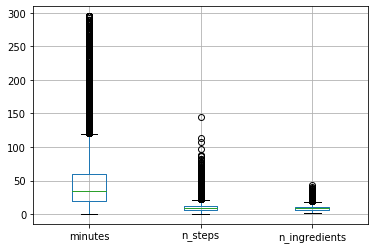

In [22]:
df[['minutes', 'n_steps', 'n_ingredients']].boxplot()

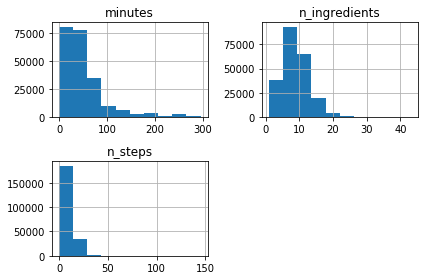

In [24]:
df[['minutes', 'n_steps', 'n_ingredients']].hist()
plt.tight_layout()

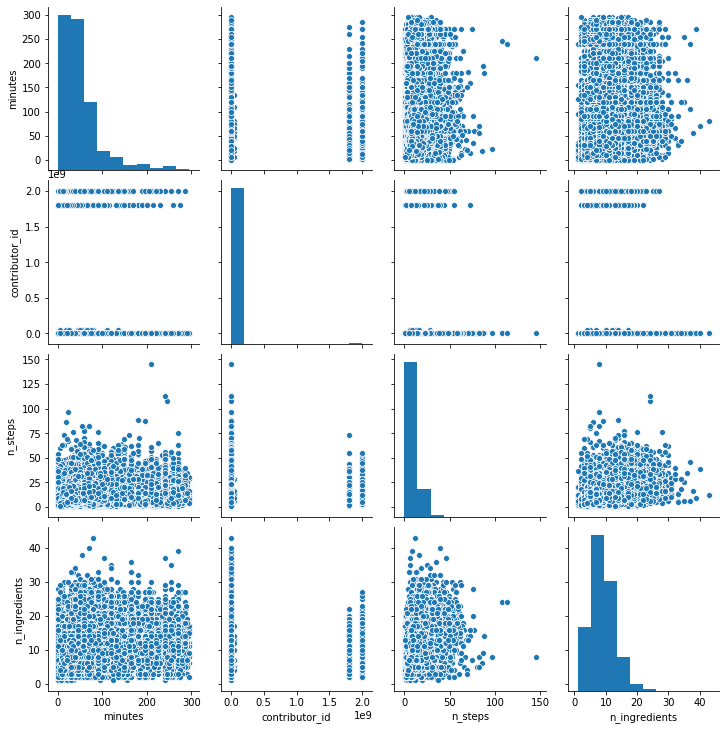

In [25]:
sns.pairplot(df)